## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [40]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [41]:
# Ваш код здес
#Xtrain['f2'].replace({np.nan: 0}, inplace=True)
Xtrain = Xtrain.fillna(0)
print(Xtrain.head())
Xtrain.info()

   f1          f2      f3        f4  f5        f6        f7        f8  \
0  50  218.593930  273536  0.104575   4  0.445026  0.274531  0.444334   
1  32  276.771005  173314  0.224684  11  0.445026  0.439103  0.444334   
2  38  218.593930   28887  0.032491   7  0.445026  0.274531  0.444334   
3  19  218.593930  427862  0.179322  10  0.049127  0.044987  0.009499   
4  44  218.593930  109339  0.032491   7  0.098837  0.115721  0.066581   

          f9       f10  f11  f12  f13       f14  target  
0   5.970149  0.300298  0.0    0   49  0.100000       0  
1   5.970149  0.300298  0.0    0   60  0.244418       0  
2  25.606721  0.300298  0.0    0   50  0.244418       0  
3  25.606721  0.300298  0.0    0   35  0.244418       0  
4   5.970149  0.113590  0.0    0   46  0.185185       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int

In [42]:
 # оценим баланс классов
Xtrain['target'].value_counts()


target
0    5708
1    1792
Name: count, dtype: int64

**Анализ распределения целевой переменной (`TARGET`):**    

- **Класс `0` : 5708 случаев (примерно 75% данных).
- **Класс `1` : 1792 случаев (примерно 25% данных).

Данные  **несбалансированы**: количество ккласс `0`, превышает количество класс `1`. Это создает проблемы при обучении модели, так как модель склонна предсказывать класс `0` чаще, чем класс `1`.   

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

здесь, в принципе accuracy можно использовать как метрику качества в задаче

### Метрика Accuracy
Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. Это особенно полезно, когда каждый класс одинаково важен. Он рассчитывается как отношение количества правильных прогнозов к их общему количеству

In [44]:
# Ваш код здесь
y = Xtrain['target']
X = Xtrain.drop(columns=['target']) # Удаление целевой переменной



### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [63]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

# Ваш код здесь
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14
7077,19,218.593930,257750,0.179322,10,0.049127,0.000000,0.023041,25.606721,0.113590,0.0,0,25,0.244418
3605,50,575.396825,198400,0.171817,9,0.445026,0.274531,0.444334,12.464986,0.300298,0.0,0,60,0.244418
5705,34,218.593930,117529,0.179322,10,0.445026,0.000000,0.444334,25.606721,0.300298,0.0,0,54,0.059211
4783,62,263.691684,151369,0.171817,9,0.049127,0.241573,0.103024,25.606721,0.300298,0.0,0,40,0.244418
5039,51,218.593930,237729,0.179322,10,0.098837,0.131370,0.066581,25.606721,0.113590,0.0,0,40,0.244418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,55,276.771005,158315,0.171817,9,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418
2158,50,263.691684,177705,0.179322,10,0.445026,0.131370,0.444334,25.606721,0.300298,0.0,1740,48,0.244418
6517,57,218.593930,180920,0.072072,6,0.445026,0.241573,0.444334,25.606721,0.300298,0.0,0,43,0.244418
5904,46,218.593930,114032,0.179322,10,0.445026,0.306604,0.444334,25.606721,0.300298,0.0,1887,45,0.244418


In [54]:
# Построение простой модели логистической регрессии
model_logr = LogisticRegression()
model_logr.fit(X_train, y_train)

# Построение простой модели опорных векторов
model_svc = SVC() 
model_svc.fit(X_train, y_train)

/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [55]:
# Оценка качества модели на тестовой выборке
y_pred_logr = model_logr.predict(X_test)
#y_pred_proba_logr = model_logr.predict_proba(X_test)[:, 1]
print(y_pred_logr)
#print(y_pred_proba_logr)
y_pred_svc = model_svc.predict(X_test)
print(y_pred_svc)
print(classification_report(y_test, y_pred_logr))
print(classification_report(y_test, y_pred_svc))


[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1142
           1       0.75      0.27      0.39       358

    accuracy                           0.80      1500
   macro avg       0.78      0.62      0.64      1500
weighted avg       0.79      0.80      0.77      1500

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1142
           1       0.96      0.07      0.14       358

    accuracy                           0.78      1500
   macro avg       0.87      0.54      0.50      1500
weighted avg       0.82      0.78      0.70      1500



Видно, что логистическая регрессия справляется с предсказаниями чуть лучше, при этом метод опрных векторов лучше предсказыветм малый класс. Пак или иначе точность предсказания обоих моделей довольно низкая

### Попробуем визуализировать влияние параметров на класс

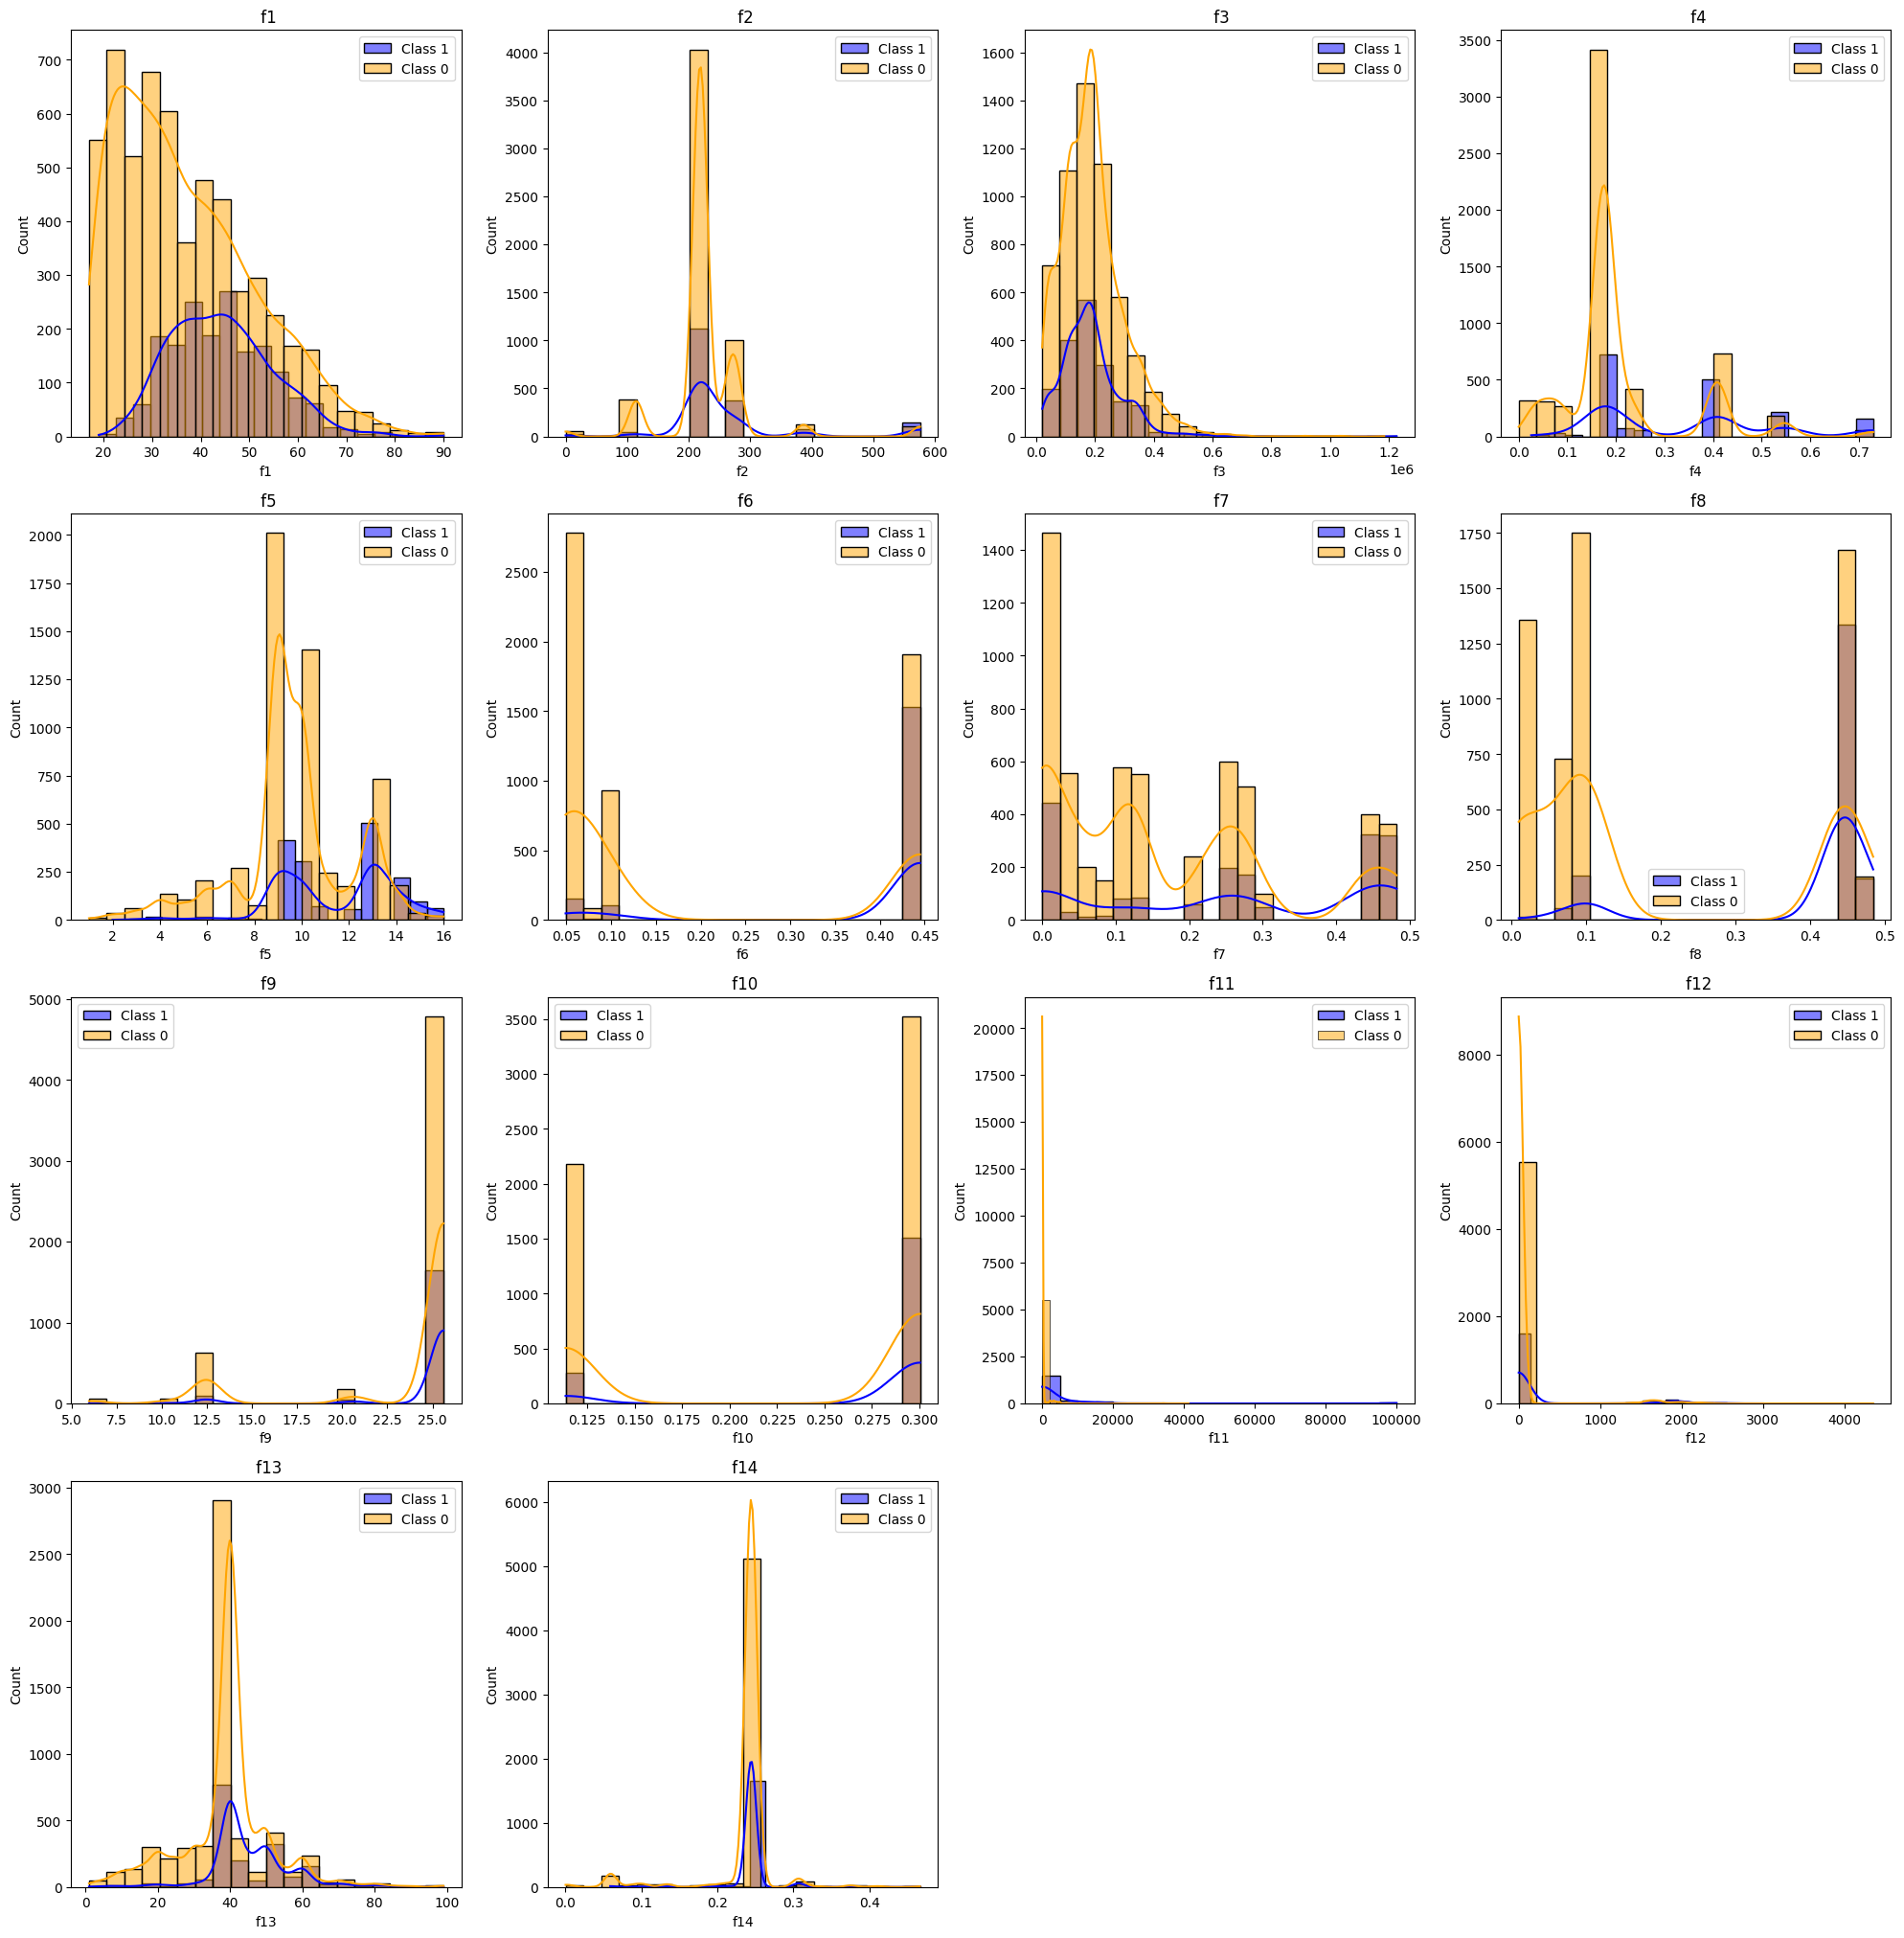

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# Получим список всех признаков, кроме целевой переменной
all_features = [col for col in Xtrain.columns if col != 'target']

# Разделение данных на клиентов с откликом и без отклика
data_class_1 = Xtrain[Xtrain['target'] == 1]  # Класс 1 (с откликом)
data_class_0 = Xtrain[Xtrain['target'] == 0]  # Класс 0 (без отклика)

# Анализ клиентов с откликами (TARGET = 1)
# Посмотрим распределение всех признаков для клиентов с откликом
plt.figure(figsize=(20, 30))
for i, feature in enumerate(all_features, 1):
    plt.subplot(6, 4, i)  # Разбиваем на 6 строк и 4 столбца для удобства отображения
    sns.histplot(data=data_class_1, x=feature, kde=True, bins=20, color='blue', label='Class 1')
    sns.histplot(data=data_class_0, x=feature, kde=True, bins=20, color='orange', label='Class 0', alpha=0.5)
    plt.title(f' {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

Из графиков видно, что 14, 9, 5 и 3 параметры не влияют на определения класса

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

### Построение модели с балансированием и страндартизацией.

In [56]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели логистической регрессии
model_logr_1 = LogisticRegression(max_iter=2000, class_weight='balanced')
model_logr_1.fit(X_train_scaled, y_train)

# Построение простой модели опорных векторов
model_svc_1 = SVC(max_iter=2000, class_weight='balanced') 
model_svc_1.fit(X_train_scaled, y_train)

# Оценка качества модели на тестовой выборке
y_pred_logr_1 = model_logr_1.predict(X_test_scaled)
y_pred_svc_1 = model_svc_1.predict(X_test_scaled)
print(y_pred_logr_1)
print(y_pred_svc_1)
print(classification_report(y_test, y_pred_logr_1))
print(classification_report(y_test, y_pred_svc_1))


/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1142
           1       0.57      0.84      0.68       358

    accuracy                           0.81      1500
   macro avg       0.75      0.82      0.77      1500
weighted avg       0.85      0.81      0.82      1500

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1142
           1       0.53      0.87      0.66       358

    accuracy                           0.78      1500
   macro avg       0.74      0.81      0.75      1500
weighted avg       0.85      0.78      0.80      1500



Видно, что логистическая регрессия справляется с предсказаниями чуть лучше, улучшилось общие предсказания по классам. Но точность предсказания обоих моделей так и осталась довольно низкая.

### Построение модели с отбором признаков через RFE

In [62]:
from sklearn.feature_selection import RFE
X_clean = X
y_clean = y

# Нормализация данных
scaler_clean = StandardScaler()
X_clean_scaled = scaler_clean.fit_transform(X_clean)

# Создание модели логистической регрессии
model_clean_lr = LogisticRegression(max_iter=2000)
# Построение  модели опорных векторов
model_clean_svc = SVC(max_iter=2000,kernel="linear", C=1) 

# Применение RFE для отбора признаков
selector_clean_lr = RFE(model_clean_lr, n_features_to_select=7, step=1)  # Оставляем 7 лучших признаков
selector_clean_lr.fit(X_clean_scaled, y_clean)
selector_clean_svc = RFE(model_clean_svc, n_features_to_select=7, step=1)  # Оставляем 7 лучших признаков
selector_clean_svc.fit(X_clean_scaled, y_clean)

# Получение выбранных признаков
selected_features_clean_lr = X_clean.columns[selector_clean_lr.support_]
print(f"Лучшие признаки lr по RFE (на чистых данных): {selected_features_clean_lr}")
selected_features_clean_svc = X_clean.columns[selector_clean_svc.support_]
print(f"Лучшие признаки svc по RFE (на чистых данных): {selected_features_clean_svc}")
# Оценка модели на отобранных признаках
X_selected_clean_lr = X_clean[selected_features_clean_lr]
X_train_sel_clean_lr, X_test_sel_clean_lr, y_train_sel_clean_lr, y_test_sel_clean_lr = train_test_split(X_selected_clean_lr, y_clean, test_size=0.2, random_state=42)
X_selected_clean_svc = X_clean[selected_features_clean_svc]
X_train_sel_clean_svc, X_test_sel_clean_svc, y_train_sel_clean_svc, y_test_sel_clean_svc = train_test_split(X_selected_clean_svc, y_clean, test_size=0.2, random_state=42)
# Нормализация отобранных признаков
X_train_sel_clean_scaled_lr = scaler_clean.fit_transform(X_train_sel_clean_lr)
X_test_sel_clean_scaled_lr = scaler_clean.transform(X_test_sel_clean_lr)
X_train_sel_clean_scaled_svc= scaler_clean.fit_transform(X_train_sel_clean_svc)
X_test_sel_clean_scaled_svc = scaler_clean.transform(X_test_sel_clean_svc)
# Обучение модели на отобранных признаках
model_rfe_clean_final_lr = LogisticRegression(max_iter=2000, class_weight='balanced')
model_rfe_clean_final_lr.fit(X_train_sel_clean_scaled_lr, y_train_sel_clean_lr)
model_rfe_clean_final_svc = SVC(max_iter=2000, class_weight='balanced')
model_rfe_clean_final_svc.fit(X_train_sel_clean_scaled_svc, y_train_sel_clean_svc)

# Оценка модели на тестовой выборке
y_pred_clean_rfe_lr = model_rfe_clean_final_lr.predict(X_test_sel_clean_scaled_lr)
y_pred_clean_rfe_svc = model_rfe_clean_final_svc.predict(X_test_sel_clean_scaled_svc)
print("Classification Report lr (на чистых данных):\n", classification_report(y_test_sel_clean_lr, y_pred_clean_rfe_lr))
print("Classification Report svc (на чистых данных):\n", classification_report(y_test_sel_clean_svc, y_pred_clean_rfe_svc))




/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/a.rukaff/Python/Python/.venv/

Лучшие признаки lr по RFE (на чистых данных): Index(['f1', 'f5', 'f6', 'f8', 'f11', 'f12', 'f13'], dtype='object')
Лучшие признаки svc по RFE (на чистых данных): Index(['f5', 'f7', 'f8', 'f9', 'f10', 'f11', 'f14'], dtype='object')


/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification Report lr (на чистых данных):
               precision    recall  f1-score   support

           0       0.95      0.76      0.85      1158
           1       0.52      0.87      0.65       342

    accuracy                           0.79      1500
   macro avg       0.74      0.82      0.75      1500
weighted avg       0.85      0.79      0.80      1500

Classification Report svc (на чистых данных):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1158
           1       0.23      1.00      0.37       342

    accuracy                           0.23      1500
   macro avg       0.61      0.50      0.19      1500
weighted avg       0.82      0.23      0.09      1500



### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

### Лучшей моделью оказалась модель логистической регрессии после применения балансировки и стандартизации

In [69]:
# Ваш код здесь

Xtest.fillna(Xtest.median(), inplace=True)
y_test_ = Xtest['target']
X_test_ = Xtest.drop(columns=['target']) # Удаление целевой переменной
X_test_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 273.6 KB


In [70]:
# Оценка качества модели на тестовой выборке
y_pred_lr_ = model_logr_1.predict(X_test_)
print(classification_report(y_test_, y_pred_lr_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1913
           1       0.23      1.00      0.38       587

    accuracy                           0.23      2500
   macro avg       0.12      0.50      0.19      2500
weighted avg       0.06      0.23      0.09      2500



/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: Unde

Ужасные результаты лучшая модеть не смогла предсказать целевую переменную на тестовой выборке от слова совсем

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

# Вывод
Простая задача с тестовыми данными не решается алгоритмами машинного обучения. Ансамбли изучим на следующем уроке может это поможет в решении задачи

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.